In [ ]:
#pip install python_speech_features

In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np


import os
import pickle
import random 
import operator

import math
import numpy as np
import collections

In [2]:
def distance(instance1 , instance2 , k ):
   
    distance =0 
    mm1 = instance1[0] 
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]

    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1)) 
#     print(distance)
    distance+=(np.dot(np.dot((mm2-mm1).transpose() , np.linalg.inv(cm2)) , mm2-mm1 )) 
#     print(distance)
    distance+= np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
#     print(distance)
    distance-= k
    return distance

In [3]:
def getNeighbors(trainingSet, instance, k):
    
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
        
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [4]:
def nearestClass(neighbors):
    classVote = {}

    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response]+=1 
        else:
            classVote[response]=1

    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [5]:
def getAccuracy(testSet,predictions):
    correct = 0 
    error=0
    for x in range (len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
        else:
            error+=1
    
    return [1.0*correct/len(testSet),1.0*error/len(testSet)]
    
    

In [7]:
import matplotlib.pyplot as plt
directory = "H:/PROJECTS/Ml package/music_speech/"
f= open("my.dat" ,'wb')
i=0

for folder in os.listdir(directory):
    i+=1
    if i==11 :
        break 
    
    for file in os.listdir(directory+folder):  
        (rate,sig) = wav.read(directory+folder+"/"+file)
#         print(rate,sig)
        mfcc_feat = mfcc(sig,rate ,winlen=0.020, appendEnergy = False)
#         print(mfcc_feat)
        covariance = np.cov(np.matrix.transpose(mfcc_feat))
#         print(covariance)
        mean_matrix = mfcc_feat.mean(0)
#         print(mean_matrix)
        feature = (mean_matrix , covariance , i)
        
        pickle.dump(feature , f)

f.close()

# plt.plot(feature)


In [8]:
import random
dataset = []

def loadDataset(filename , split , trSet , teSet):
    with open("my.dat",'rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break  

    for x in range(len(dataset)):
        if random.random() <split :      
            trSet.append(dataset[x])
        else:
            teSet.append(dataset[x])  

trainingSet = []
testSet = []
loadDataset("my.dat" , 0.66, trainingSet, testSet)
print(len(trainingSet))
# print(trainingSet)

650


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

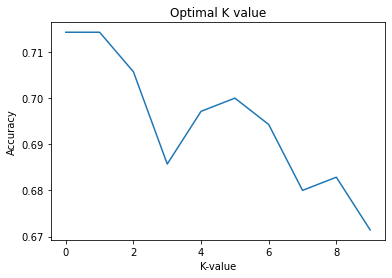

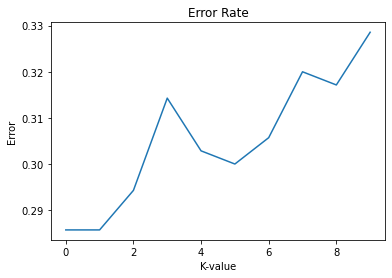

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import *
leng = len(testSet)

accuracy=[]
error=[]

for j in range(10):
    predictions = []
    

    for x in range (leng):
        predictions.append(nearestClass(getNeighbors(trainingSet ,testSet[x] , j+1))) 
    a=[]
    for i in range(len(testSet)):
        a.append(testSet[i][-1])
        
    actual_output=[]
    for i in range(len(testSet)):
          actual_output.append(testSet[i][-1])
    print(actual_output)
    from sklearn import metrics
    print("K=",j+1)

    # Printing the confusion matrix
    # The columns will show the instances predicted for each label,
    # and the rows will show the actual number of instances for each label.
    print(metrics.confusion_matrix(actual_output, predictions, labels=[1,2,3,4,5,6,7,8,9,10]))
    # Printing the precision and recall, among other metrics
    print(metrics.classification_report(actual_output, predictions, labels=[1,2,3,4,5,6,7,8,9,10]))
    
    output=getAccuracy(testSet , predictions)
    accuracy.append(output[0])
    error.append(output[1])
print(accuracy)
k  = accuracy.index(max(accuracy))+1
print(k)

plot1=plt.figure(1)
plt.plot(accuracy)
plt.xlabel("K-value")
plt.ylabel("Accuracy")
plt.title("Optimal K value")


plot2=plt.figure(2)
plt.plot(error)
plt.xlabel("K-value")
plt.ylabel("Error")
plt.title("Error Rate")
plt.show()



In [17]:

from collections import defaultdict
results=defaultdict(int)
i=1
for folder in os.listdir("H:/PROJECTS/Ml package/music_speech"):
    results[i]=folder
    i+=1

(rate,sig)=wav.read("H:/PROJECTS/Ml package/file1.wav") 
mfcc_feat=mfcc(sig,rate,winlen=0.020,appendEnergy=False) 
covariance = np.cov(np.matrix.transpose(mfcc_feat)) 
mean_matrix = mfcc_feat.mean(0) 
feature=(mean_matrix,covariance,0) 
pred=nearestClass(getNeighbors(dataset ,feature , k))

print(results[pred])



pop


In [12]:
#pip install playsound

Note: you may need to restart the kernel to use updated packages.


In [13]:
 
from playsound import playsound

In [18]:
def playmusic(genre):
    directory="H:/PROJECTS/Ml package/music_speech/"
    for file in os.listdir(directory+genre):
            playsound(directory+genre+"/"+file)